In [4]:
import pandas as pd
df=pd.read_csv("../data/togo-dapaong_qc.csv")
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [5]:
missing_values=df.isna().sum()
percent_missing=(missing_values/len(df))*100
missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    '% of Total': percent_missing
})
missing_report[missing_report['% of Total'] > 5]

,Missing Values,% of Total
Comments,525600,100.0


In [6]:
from scipy.stats import zscore

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols_to_check].apply(zscore)

# Identify rows with Z-score > 3 or < -3
outliers = (z_scores.abs() > 3)
df_outliers = df[outliers.any(axis=1)]
print(df_outliers)

               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
4985    2021-10-28 11:06  1139.0  805.1  466.1  1172.0  1154.0  29.8  70.8   
5410    2021-10-28 18:11    -1.2    0.0    0.0     0.0     0.0  29.7  63.5   
5411    2021-10-28 18:12    -1.0    0.0    0.0     0.0     0.0  29.3  62.4   
5413    2021-10-28 18:14    -0.8    0.0    0.0     0.0     0.0  28.6  63.7   
5420    2021-10-28 18:21    -1.3    0.0    0.0     0.0     0.0  27.7  64.5   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
510473  2022-10-14 11:54   709.5   63.7  629.8   703.1   694.9  30.2  66.6   
510474  2022-10-14 11:55   677.8   40.6  621.7   670.1   662.2  30.2  66.7   
510475  2022-10-14 11:56   659.5   29.7  614.9   651.0   643.4  30.3  66.1   
510476  2022-10-14 11:57   660.1   40.7  605.6   653.2   645.6  30.2  66.0   
510477  2022-10-14 11:58   655.8   50.2  591.0   647.5   639.9  30.2  66.2   

         WS  WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Pr

In [7]:
# Impute missing values in key columns with median
for col in cols_to_check:
 df[col] = df[col].fillna(df[col].median())


# Drop rows if Timestamp or target values are missing
df.dropna(subset=['Timestamp', 'GHI', 'DNI', 'DHI'], inplace=True)

In [8]:
df.to_csv("../data/togo-dapaong_qc_clean.csv", index=False)

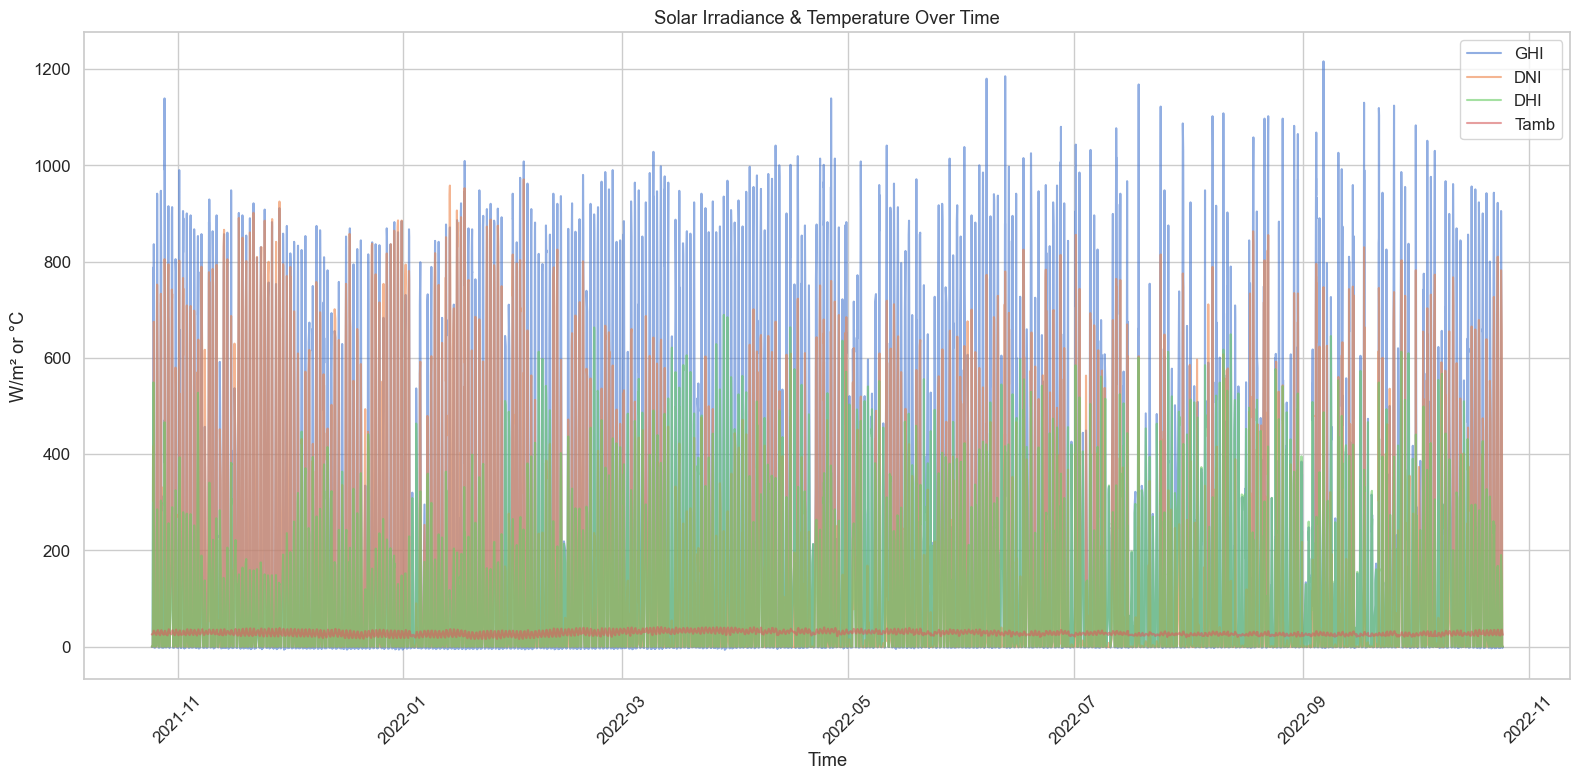

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Plot GHI, DNI, DHI, Tamb over time (use a sample for performance)
sample_df = df.sample(5000).sort_values('Timestamp')

plt.figure(figsize=(16, 8))
plt.plot(sample_df['Timestamp'], sample_df['GHI'], label='GHI', alpha=0.6)
plt.plot(sample_df['Timestamp'], sample_df['DNI'], label='DNI', alpha=0.6)
plt.plot(sample_df['Timestamp'], sample_df['DHI'], label='DHI', alpha=0.6)
plt.plot(sample_df['Timestamp'], sample_df['Tamb'], label='Tamb', alpha=0.6)
plt.legend()
plt.title('Solar Irradiance & Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('W/m² or °C')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

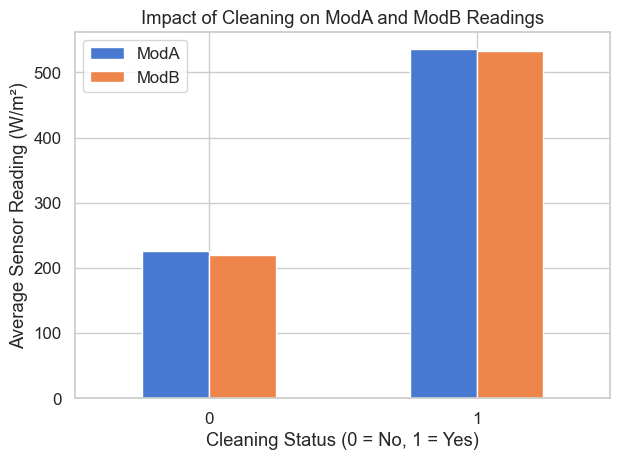

In [11]:
# Group by Cleaning status and compute average ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Bar plot of average ModA and ModB by Cleaning status
plt.figure(figsize=(10, 5))
cleaning_impact.plot(x='Cleaning', kind='bar', legend=True)
plt.title('Impact of Cleaning on ModA and ModB Readings')
plt.xlabel('Cleaning Status (0 = No, 1 = Yes)')
plt.ylabel('Average Sensor Reading (W/m²)')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

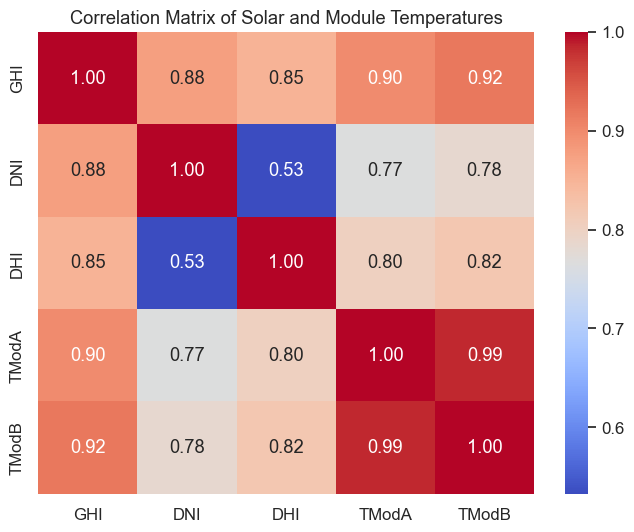

In [12]:
correlation_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Solar and Module Temperatures")
plt.show()

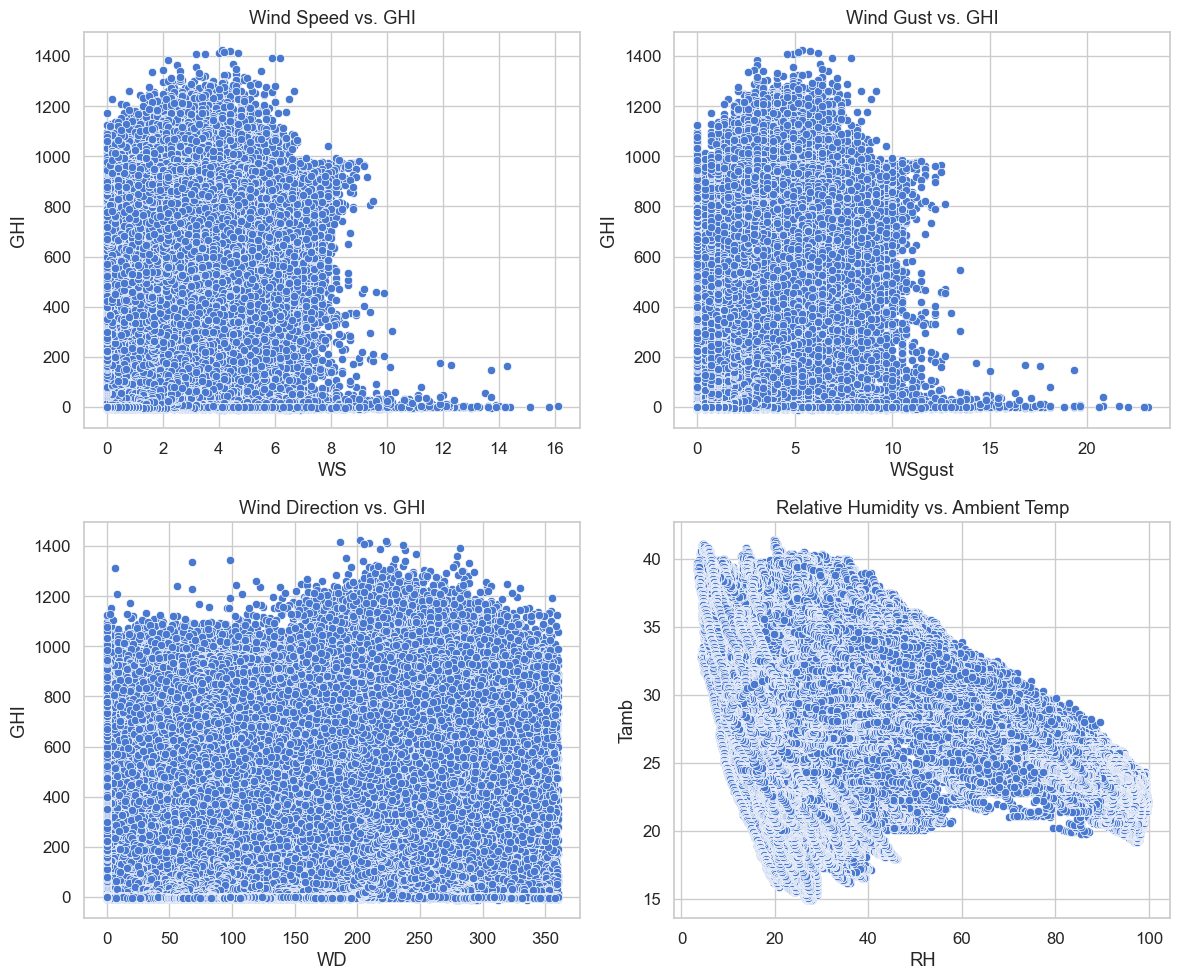

In [13]:
# Scatter plots to examine environmental factors vs GHI
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=df, x='WS', y='GHI', ax=axs[0, 0])
axs[0, 0].set_title('Wind Speed vs. GHI')

sns.scatterplot(data=df, x='WSgust', y='GHI', ax=axs[0, 1])
axs[0, 1].set_title('Wind Gust vs. GHI')

sns.scatterplot(data=df, x='WD', y='GHI', ax=axs[1, 0])
axs[1, 0].set_title('Wind Direction vs. GHI')

sns.scatterplot(data=df, x='RH', y='Tamb', ax=axs[1, 1])
axs[1, 1].set_title('Relative Humidity vs. Ambient Temp')

plt.tight_layout()
plt.show()

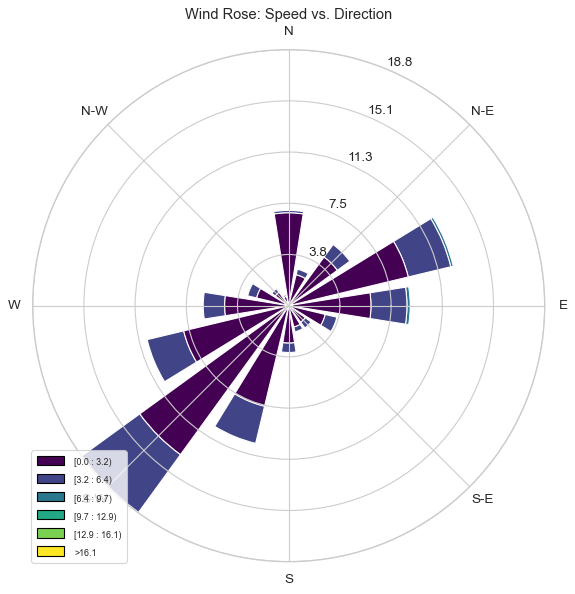

In [15]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from windrose import WindroseAxes

# Clean data: drop NaNs
wind_data = df.dropna(subset=['WS', 'WD'])

ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], normed=True, opening=0.8, edgecolor='white', cmap=plt.cm.viridis)
ax.set_legend()
plt.title("Wind Rose: Speed vs. Direction")
plt.show()

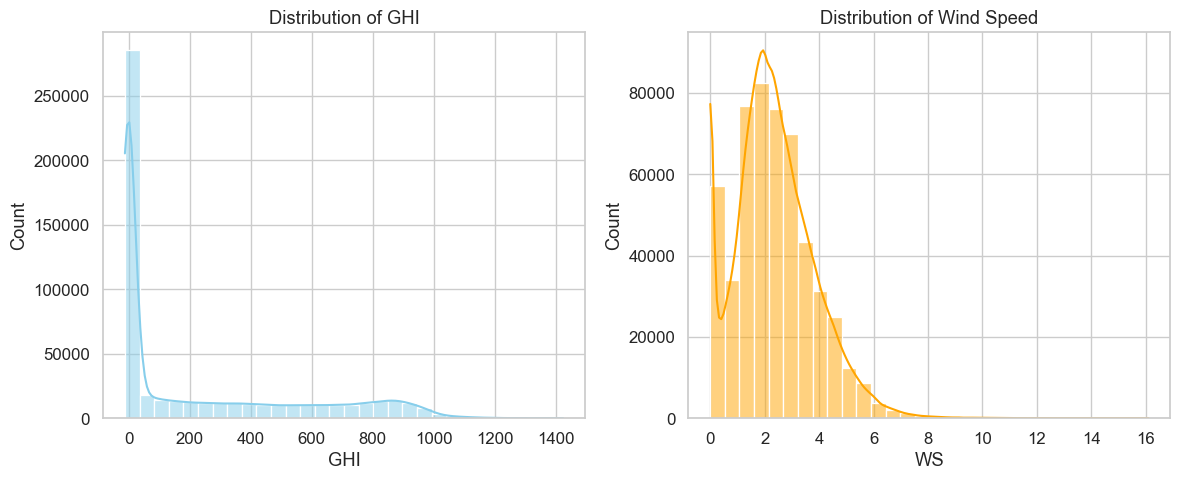

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['GHI'], bins=30, kde=True, ax=axs[0], color="skyblue")
axs[0].set_title("Distribution of GHI")

sns.histplot(df['WS'], bins=30, kde=True, ax=axs[1], color="orange")
axs[1].set_title("Distribution of Wind Speed")

plt.tight_layout()
plt.show()

In [17]:
df_daylight = df[df['GHI'] > 0].copy()

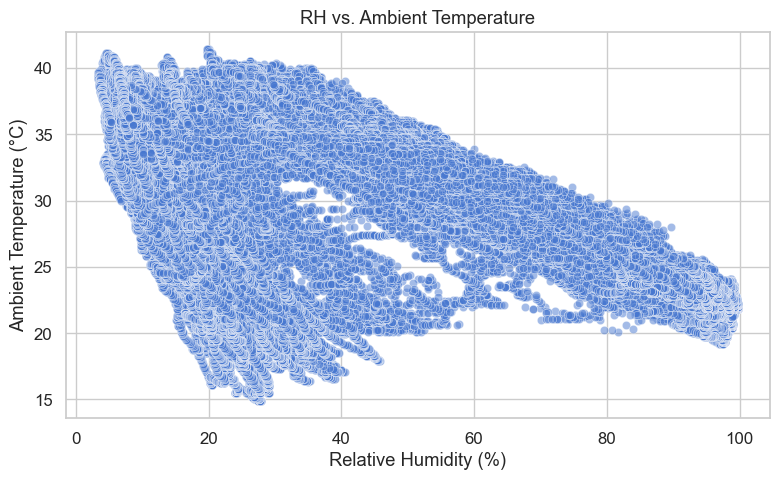

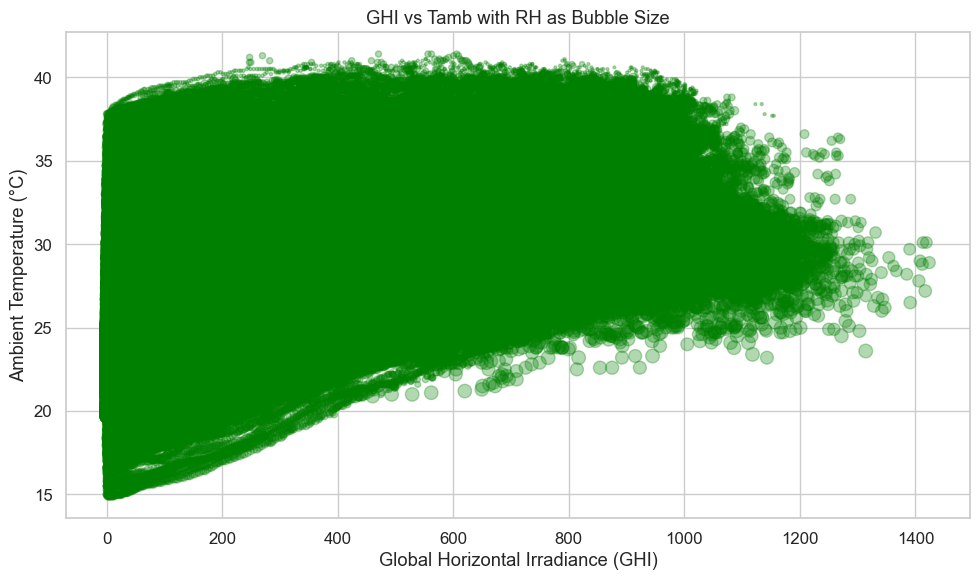

In [18]:
# RH vs Tamb
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_daylight, x='RH', y='Tamb', alpha=0.5)
plt.title('RH vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.tight_layout()
plt.show()

# Bubble chart: GHI vs Tamb, bubble size = RH
plt.figure(figsize=(10, 6))
plt.scatter(df_daylight['GHI'], df_daylight['Tamb'], s=df_daylight['RH'], alpha=0.3, c='green')
plt.title('GHI vs Tamb with RH as Bubble Size')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (°C)')
plt.tight_layout()
plt.show()